In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [2]:

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('SONY.csv')


In [3]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [5]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 8:2
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [8]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [9]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.21699360312018923
Coefficients: [0.00047881]
R-squared: 0.36165139479143993


In [11]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [12]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [13]:
# Đánh giá độ chính xác trên tập kiểm tra
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"MAPE trên tập kiểm tra: {test_mape}")
print(f"RMSE trên tập kiểm tra: {test_rmse}")
print(f"MSLE trên tập kiểm tra: {test_msle}")
print(f"R² trên tập kiểm tra: {test_r2}")

MAPE trên tập kiểm tra: 0.48245813325897324
RMSE trên tập kiểm tra: 0.26122268025868123
MSLE trên tập kiểm tra: 0.025173814332531352
R² trên tập kiểm tra: -15.05921029816109


In [14]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [15]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[115.47944853 115.52089393 115.56233933 115.60378473 115.64523013
 115.68667553 115.72812093 115.76956633 115.81101173 115.85245713
 115.89390253 115.93534793 115.97679333 116.01823872 116.05968412
 116.10112952 116.14257492 116.18402032 116.22546572 116.26691112
 116.30835652 116.34980192 116.39124732 116.43269272 116.47413812
 116.51558352 116.55702892 116.59847432 116.63991972 116.68136512]


In [16]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [17]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [18]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

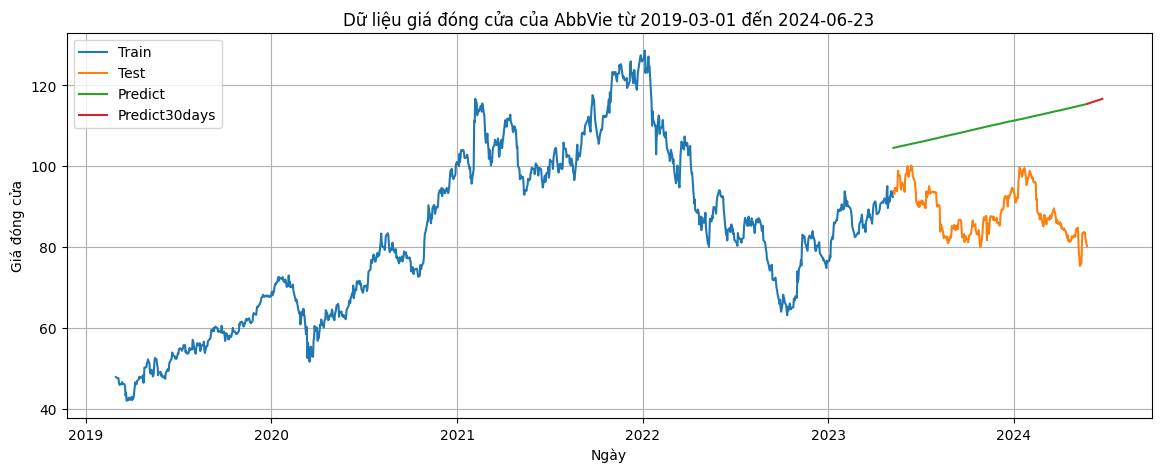

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [20]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [21]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[115.47944853 115.52089393 115.56233933 115.60378473 115.64523013
 115.68667553 115.72812093 115.76956633 115.81101173 115.85245713
 115.89390253 115.93534793 115.97679333 116.01823872 116.05968412
 116.10112952 116.14257492 116.18402032 116.22546572 116.26691112
 116.30835652 116.34980192 116.39124732 116.43269272 116.47413812
 116.51558352 116.55702892 116.59847432 116.63991972 116.68136512
 116.72281052 116.76425592 116.80570132 116.84714672 116.88859212
 116.93003752 116.97148292 117.01292832 117.05437372 117.09581912
 117.13726452 117.17870992 117.22015532 117.26160072 117.30304612
 117.34449152 117.38593692 117.42738232 117.46882772 117.51027311
 117.55171851 117.59316391 117.63460931 117.67605471 117.71750011
 117.75894551 117.80039091 117.84183631 117.88328171 117.92472711]


In [22]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

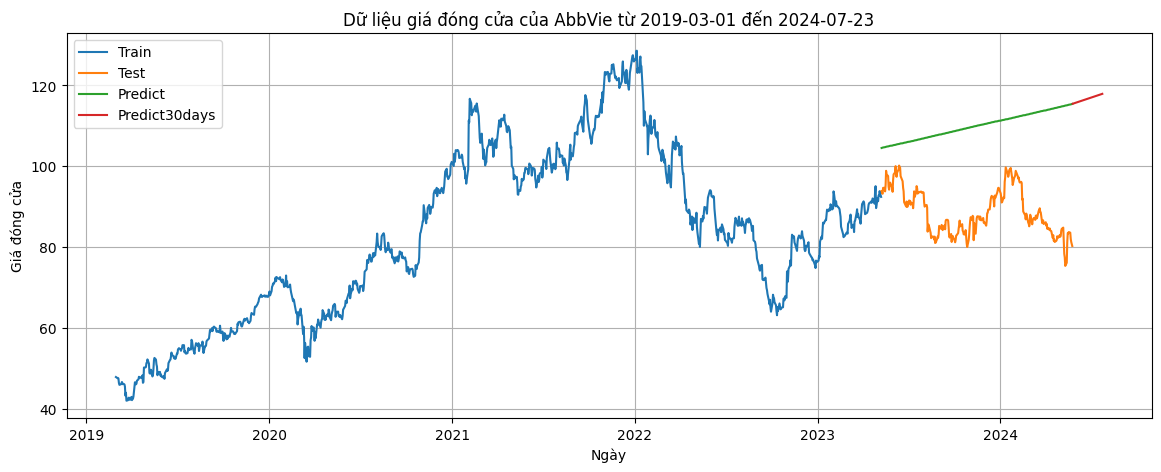

In [23]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [24]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [25]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

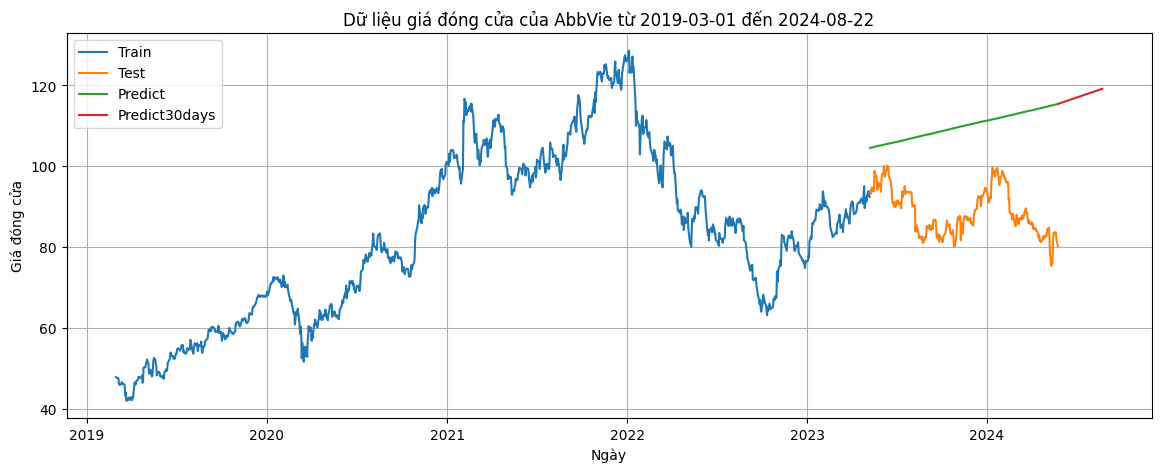

In [26]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()